## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sorted_df = combined_data.groupby(["Mouse ID","Timepoint"])
find_duplicates = sorted_df.head()
duplicates = find_duplicates[find_duplicates.duplicated(["Mouse ID","Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicates = find_duplicates.drop_duplicates(subset=["Mouse ID","Timepoint"])
drop_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
drop_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_df = drop_duplicates
regimen = clean_df.groupby(["Drug Regimen"])

mean = regimen["Tumor Volume (mm3)"].mean()
median = regimen["Tumor Volume (mm3)"].median()
var = regimen["Tumor Volume (mm3)"].var()
std_dev = regimen["Tumor Volume (mm3)"].std()
sem = regimen["Tumor Volume (mm3)"].sem()

drug_regimen_stats = pd.DataFrame({"Mean": mean,
                          "Median": median,
                          "Variance": var,
                          "Standard Deviation": std_dev,
                          "SEM": sem})
drug_regimen_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

clean_df = drop_duplicates
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

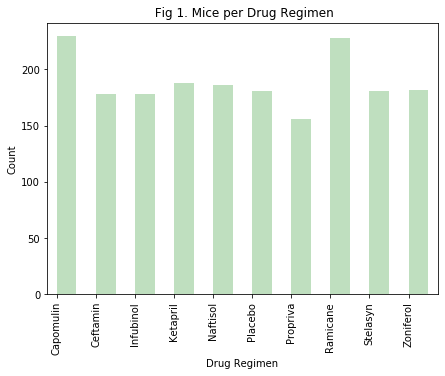

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = regimen["Mouse ID"].count()

my_plot = mouse_count.plot.bar(title=" Fig 1. Mice per Drug Regimen", color="g", alpha=0.25,align="edge", figsize=(7,5))
my_plot.set_ylabel("Count")
plt.savefig("../Figures/Pandas_Drug_Regimens.png")

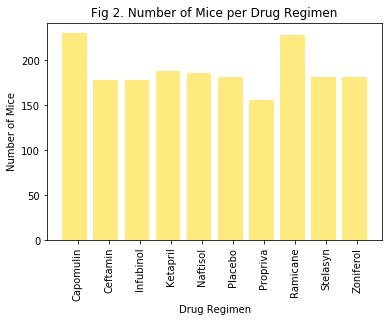

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

names = np.arange(len(list(mouse_count.index.values)))
ticks = list(mouse_count.index)
mice_per_regimen = mouse_count.values
 
plt.bar(names-0.5, mice_per_regimen, color="gold", alpha=0.5, align = "edge")
plt.xticks(names,ticks, rotation="vertical")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.title("Fig 2. Number of Mice per Drug Regimen")
plt.savefig("../Figures/Pyplot_Drug_Regimens.png")
plt.show()


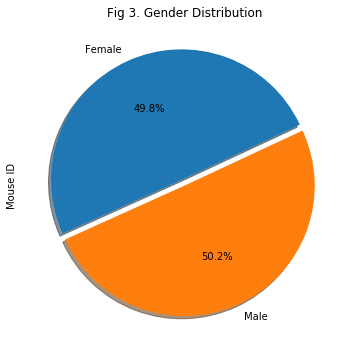

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_df.groupby(["Sex"]).nunique()
gender_count = gender["Mouse ID"].head()
gender_count
explode = (0.05,0)

gender_count.plot(kind="pie", figsize=(9,6), explode=explode, shadow=True, startangle=25, autopct='%1.1f%%', title="Fig 3. Gender Distribution")
plt.savefig("../Figures/Pandas_Gender_Disrtibution_Pie_Chart.png")
plt.show()


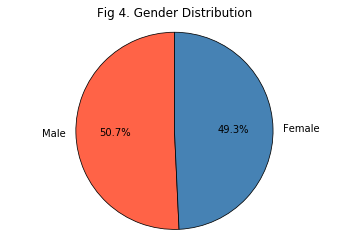

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


names = clean_df["Sex"].unique()
counts = clean_df["Sex"].value_counts()
explode = (.25, 0)

plt.pie(counts, labels=names, colors = ("tomato","steelblue"), autopct='%1.1f%%', wedgeprops = {'linewidth': .75,'edgecolor':'black'}, startangle=90, explode=explode, radius=5000)
plt.axis("equal")
plt.title("Fig 4. Gender Distribution")
plt.savefig("../Figures/Pyplot_Gender_Disrtibution_Pie_Chart.png")
plt.show()

# gender_count2 = clean_df.groupby(["Sex"]).agg({"Mouse ID": ["nunique"]})
# plt.pie(gender_count2)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_df.groupby(["Mouse ID"]).head()
max_timepoint
regimen_max_timepoint = max_timepoint.loc[(max_timepoint["Drug Regimen"] == "Capomulin")|(max_timepoint["Drug Regimen"] == "Ramicane")|
                                         (max_timepoint["Drug Regimen"] == "Infubinol")|(max_timepoint["Drug Regimen"] == "Ceftamin")]

final_vol = regimen_max_timepoint.reset_index()
final_vol

group = final_vol.groupby(["Drug Regimen"]).head()
group
regimen_group = final_vol.set_index(["Drug Regimen"]) 
regimen_group

# How do I organize this dataframe by the individual drug regimen as the column headers, with the tumor volume for each mouse for each given drug regimen?
                                   


,index,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,,
Ramicane,0,k403,Male,21,16,0,45.000000,0
Ramicane,1,k403,Male,21,16,5,38.825898,0
Ramicane,2,k403,Male,21,16,10,35.014271,1
Ramicane,3,k403,Male,21,16,15,34.223992,1
Ramicane,4,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
Infubinol,1863,z581,Female,24,25,0,45.000000,0
Infubinol,1864,z581,Female,24,25,5,49.273092,1
Infubinol,1865,z581,Female,24,25,10,50.478750,2


## Correlation and Regression

In [14]:
## Put treatments into a list for for loop (and later for plot labels)/Create empty list to fill with tumor vol data (for plotting)

infubinol_tumor_vol = []
ceftamin_tumor_vol = []
ramicane_tumor_vol = []
capomulin_tumor_vol = []

for row, col in regimen_group.iterrows():
##     print(row, col["Tumor Volume (mm3)"])
    if row == "Infubinol":
        infubinol_tumor_vol.append(col["Tumor Volume (mm3)"])
#         inf_quartiles = regimen_group["Tumor Volume (mm3)"]["Infubinol"].quantile([.25,.5,.75]) 
    elif row == "Ceftamin":
        ceftamin_tumor_vol.append(col["Tumor Volume (mm3)"])
#         ceft_quartiles = regimen_group["Tumor Volume (mm3)"]["Ceftamin"].quantile([.25,.5,.75])
    elif row == "Ramicane":
        ramicane_tumor_vol.append(col["Tumor Volume (mm3)"])
#         ram_quartiles = regimen_group["Tumor Volume (mm3)"]["Ramicane"].quantile([.25,.5,.75])
    elif row == "Capomulin":
        capomulin_tumor_vol.append(col["Tumor Volume (mm3)"])
#         cap_quartiles = regimen_group["Tumor Volume (mm3)"]["Capomulin"].quantile([.25,.5,.75])
    
# print(f'The quartiles for Infubinol are:\n{inf_quartiles}\n The quartiles for Ceftamin are:\n{ceft_quartiles}\n The quartiles for Ramicane are:\n {ram_quartiles}\n The quartiles for Capomulin are:\n{cap_quartiles}')



In [15]:
## Calculate the IQR and quantitatively determine if there are any potential outliers. 
## Locate the rows which contain mice on each drug and get the tumor volumes 
## add subset         
# Determine outliers using upper and lower bounds

quartiles_infubinol = regimen_group.loc["Infubinol"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol
lower_bound_infubinol = round(lowerq_infubinol - (1.5*iqr_infubinol),2)
upper_bound_infubinol = round(upperq_infubinol + (1.5*iqr_infubinol),2)
outliers_lower_infub = regimen_group.loc["Infubinol"]["Tumor Volume (mm3)"][(regimen_group.loc["Infubinol"]["Tumor Volume (mm3)"]<lower_bound_infubinol)].values
outliers_upper_infub = regimen_group.loc["Infubinol"]["Tumor Volume (mm3)"][(regimen_group.loc["Infubinol"]["Tumor Volume (mm3)"]>upper_bound_infubinol)].values
# print(f'Outliers for Infubinol are {outliers_lower_infub}')


quartiles_ceftamin = regimen_group.loc["Ceftamin"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin
lower_bound_ceftamin = round(lowerq_ceftamin - (1.5*iqr_ceftamin),2)
upper_bound_ceftamin = round(upperq_ceftamin + (1.5*iqr_ceftamin),2)
outliers_lower_ceftamin = regimen_group.loc["Ceftamin"]["Tumor Volume (mm3)"][(regimen_group.loc["Ceftamin"]["Tumor Volume (mm3)"]<lower_bound_ceftamin)].values
outliers_upper_ceftamin = regimen_group.loc["Ceftamin"]["Tumor Volume (mm3)"][(regimen_group.loc["Ceftamin"]["Tumor Volume (mm3)"]>upper_bound_ceftamin)].values
# print(f'Outliers for Ceftamin are {outliers_lower_ceftamin}{outliers_upper_ceftamin}')

quartiles_ramicane = regimen_group.loc["Ramicane"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane
lower_bound_ramicane = round(lowerq_ramicane - (1.5*iqr_ramicane),2)
upper_bound_ramicane = round(upperq_ramicane + (1.5*iqr_ramicane),2)
outliers_lower_ramicane = regimen_group.loc["Ramicane"]["Tumor Volume (mm3)"][(regimen_group.loc["Ramicane"]["Tumor Volume (mm3)"]<lower_bound_ramicane)].values
outliers_upper_ramicane = regimen_group.loc["Ramicane"]["Tumor Volume (mm3)"][(regimen_group.loc["Ramicane"]["Tumor Volume (mm3)"]>upper_bound_ramicane)].values
# print(f'Outliers for Ramicane are {outliers_lower_ramicane}{outliers_upper_ramicane}')

quartiles_capomulin = regimen_group.loc["Capomulin"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin
lower_bound_capomulin = round(lowerq_capomulin - (1.5*iqr_capomulin),2)
upper_bound_capomulin = round(upperq_capomulin + (1.5*iqr_capomulin),2)
outliers_lower_capomulin = regimen_group.loc["Capomulin"]["Tumor Volume (mm3)"][(regimen_group.loc["Capomulin"]["Tumor Volume (mm3)"]<lower_bound_capomulin)].values
outliers_upper_capomulin = regimen_group.loc["Capomulin"]["Tumor Volume (mm3)"][(regimen_group.loc["Capomulin"]["Tumor Volume (mm3)"]>upper_bound_capomulin)].values
# print(f'Outliers for Capomulin are {outliers_lower_capomulin}{outliers_upper_capomulin}')

print(f"Tumor volumes (mm3) below {lower_bound_infubinol} and above {upper_bound_infubinol} could be outliers for mice that received a Infubninol drug regimen.")
print(f'Outliers for Infubinol are {outliers_lower_infub}')
print("")
print(f"Tumor volumes (mm3) below {lower_bound_ceftamin} and above {upper_bound_ceftamin} could be outliers for mice that received a Ceftamin drug regimen.") 
print(f'No outliers found for Ceftamin')
print("")
print(f"Tumor volumes (mm3) below {lower_bound_ramicane} and above {upper_bound_ramicane} could be outliers for mice that received a Ramicane drug regimen.")
print(f'Outliers for Ramicane are {outliers_lower_ramicane}{outliers_upper_ramicane}')
print("")
print(f"Tumor volumes (mm3) below {lower_bound_capomulin} and above {upper_bound_capomulin} could be outliers for mice that received a Capomulin drug regimen.") 
print(f'Outliers for Capomulin are {outliers_lower_capomulin}{outliers_upper_capomulin}')

Tumor volumes (mm3) below 36.93 and above 59.96 could be outliers for mice that received a Infubninol drug regimen.
Outliers for Infubinol are [36.3213458]

Tumor volumes (mm3) below 38.45 and above 57.42 could be outliers for mice that received a Ceftamin drug regimen.
No outliers found for Ceftamin

Tumor volumes (mm3) below 34.2 and above 51.48 could be outliers for mice that received a Ramicane drug regimen.
Outliers for Ramicane are [32.99772858][]

Tumor volumes (mm3) below 34.21 and above 52.43 could be outliers for mice that received a Capomulin drug regimen.
Outliers for Capomulin are [32.62300253 30.48598484][]


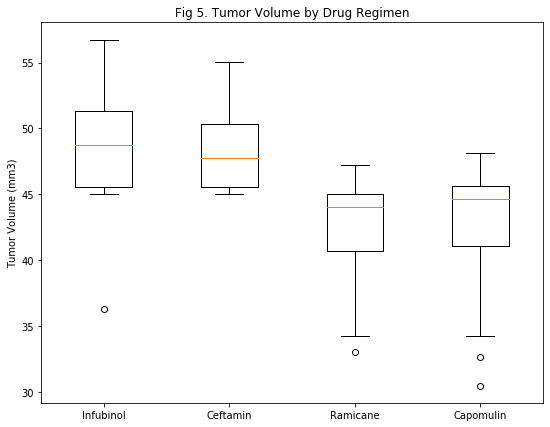

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.set_title('Fig 5. Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([infubinol_tumor_vol, ceftamin_tumor_vol,ramicane_tumor_vol, capomulin_tumor_vol], labels = ["Infubinol", "Ceftamin","Ramicane", "Capomulin"], notch=0)
plt.savefig("../Figures/Box_Plot_Tumor_Volume.png")
plt.show()


## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = clean_df[clean_df["Drug Regimen"]=="Capomulin"]
one_mouse = capomulin_df[capomulin_df["Mouse ID"]=="s185"]
one_mouse
# # fig, ax = plt.subplots()
# one_mouse.plot(kind="line",x="Timepoint", y="Tumor Volume (mm3)", figsize=(9,7), color="magenta")
# plt.ylabel("Tumor Volume (mm3)")
# plt.xticks(np.arange(0,55,5))
# plt.title("Fig 6. Timepoint vs Tumor Volume for mouse s185")
# plt.savefig("../Figures/Line_Plot_Capomulin_vs_Timepoint.png")
# plt.show()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


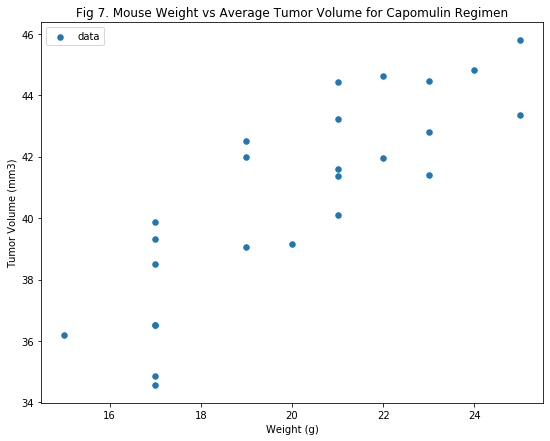

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_mean = capomulin_df.groupby(["Mouse ID"])[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]].mean()

# N = 25
# colors = np.random.rand(N)
# area=(30 * np.random.rand(N))**2

capomulin_mean.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", figsize=(9,7), s=30, label="data")
plt.title("Fig 7. Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.legend()
plt.savefig("../Figures/Scatter_Plot_Mouse_Weight_vs_Tumor_Volume.png")
plt.show()


## Correlation and Regression

The r-squared is: 0.7088568047708717
The SEM is 0.1275435903320134


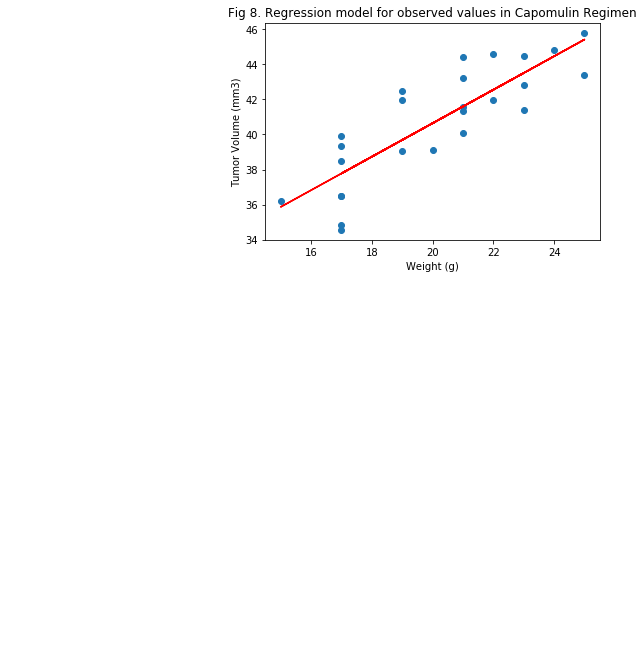

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Tumor Volume (mm3)']

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, label="")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Fig 8. Regression model for observed values in Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {r_value**2}")
print(f'The SEM is {std_err}')
plt.savefig("../Figures/Linear_Regression_Weight_vs_Tumor_Volume.png")
plt.show()
